In [1]:
from feature_extractor import get_base_model, get_model_by_layer, convert_img_to_feature
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import pickle 
%matplotlib inline
import numpy as np

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.ensemble import RandomForestClassifier as RandomForest
import seaborn as sns

In [4]:
from xgboost import XGBClassifier

In [5]:
base_model, model_select = get_base_model('vgg16',image_size=None, verbose=False)
print(model_select)

model name is: vgg16
Using default image size: (224, 224). Can include top Dense Layer !!
{'image_size': (224, 224), 'layer': 'block5_pool', 'den_layer': 'fc1', 'name': 'vgg16'}


In [6]:
model = get_model_by_layer(base_model, layer_name='fc1')

C:\Users\hj5446\Dropbox\F_Disk\1Research\1_Experiement\1_fracture_recognition\git\fracture_detection\feature_extractor.py:71: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("fc...)`
  model = Model(input=base_model.input, output=base_model.get_layer(layer_name).output)


In [7]:
def load_images(path, filename, verbose = 0):
    image_size = model_select['image_size']
    images = []
    file = open(path+filename)
    lines = file.readlines()
    img_filenames = [line.rstrip('\n') for line in lines] # get all image file names
    
    n_all = len(img_filenames)
    n_unique = len(set(img_filenames))
    if  n_all != n_unique:  
        print('check duplicate orgin len {},  unique len {}'.format(n_all, n_unique))
    
    n_imgs = len(img_filenames)
    print('No. of images {}'.format(n_imgs))
    
    for i, filename in enumerate(img_filenames):
        img_path = path + filename
        img = image.load_img(img_path, target_size=image_size) 
        images.append(img)
        
        # Print image
        if verbose and i%verbose == 0 :
            print(i,img_path)
            plt.imshow(img)
            plt.show()
    return images

def convert_imgs_to_features(images, label=0, verbose=0):
    features = []
    n_imgs = len(images)

    # Get lables
    if label == 0:
        print('label 0, it is not fracture')
        labels = np.zeros((n_imgs,1))
    else:
        print('label 1, it is fracture')
        labels = np.ones((n_imgs,1))

    # Get features
    for i,img in enumerate(images):
        feature = convert_img_to_feature(img, model=model)
        features.append(feature)

        if verbose and i%verbose ==0:
            print(i, end=', ')

    return features, labels

In [8]:
if 0:
    path_nf='dataset/fractures/nf/' 
    filename_nf='nf.txt'
    images_nf = load_images(path_nf, filename_nf, verbose=600)
    #pickle.dump(images_nf, open( "dataset/fractures/images_nf.p", "wb" ))
if 1:
    images_nf = pickle.load(open("dataset/fractures/images_nf.p", 'rb'))
    print(len(images_nf))

1143


In [9]:
if 0:
    path_ff='dataset/fractures/ff_flip/' 
    filename_ff='ff.txt'
    images_ff = load_images(path_ff, filename_ff, verbose=600)
#pickle.dump(images_ff, open( "dataset/fractures/images_ff.p", "wb" ))
if 1:
    images_ff = pickle.load(open("dataset/fractures/images_ff.p", 'rb'))
    print(len(images_ff))

954


In [10]:
features_ff, labels_ff  = convert_imgs_to_features(images_ff, label=1, verbose=20)

label 1, it is fracture
0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 

In [11]:
features_nf, labels_nf  = convert_imgs_to_features(images_nf, label=0, verbose=20)

label 0, it is not fracture
0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000, 1020, 1040, 1060, 1080, 1100, 1120, 1140, 

In [12]:
features_total = np.vstack(( np.array(features_nf), np.array(features_ff)) )
labels_total = np.vstack((labels_nf, labels_ff)).ravel()
print(len(features_nf), len(features_ff), features_total.shape, labels_total.shape)

1143 954 (2097, 4096) (2097,)


In [13]:
seed = 20
features_np = np.array(features_total)
labels_np = np.array(labels_total)
(trainData, testData, trainLabels, testLabels) = train_test_split(features_np,
                                                                  labels_np,
                                                                  test_size=0.3, #test_size,
                                                                  random_state=seed)
model_LR = LogisticRegression(random_state=seed)
model_LR.fit(trainData, trainLabels)
testLabels_pre = model_LR.predict(testData)
score_LR = accuracy_score(testLabels, testLabels_pre)
score_LR

0.94920634920634916

In [ ]:
for i,testlabel in enumerate(testLables):
    if testlabel != 

### learning curve 

In [78]:
train_sizes, train_scores, valid_scores = learning_curve(\
    LogisticRegression(random_state=seed), trainData, trainLabels, train_sizes=[0.2,0.4,0.6,0.8,1.0], cv=5)

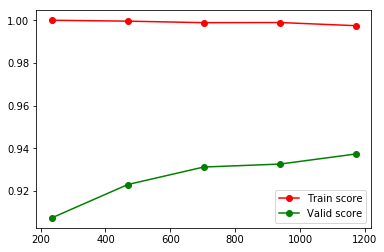

In [79]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Train score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",
             label="Valid score")
plt.legend()

In [63]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] } #  
clf = GridSearchCV(LogisticRegression(random_state=seed), param_grid, return_train_score=True)
clf.fit(trainData, trainLabels)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=20, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

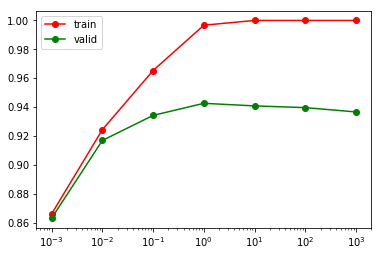

In [69]:
clf_mean_train_score = clf.cv_results_['mean_train_score']
clf_mean_test_score = clf.cv_results_['mean_test_score']
plt.semilogx(param_grid['C'], clf_mean_train_score,'ro-',label='train')
plt.semilogx(param_grid['C'], clf_mean_test_score,'go-',label='valid')
plt.legend()

In [77]:
model_xgb = XGBClassifier()
#model.fit(X_train, y_train)
model_xgb.fit(trainData, trainLabels)
testLabels_pre = model_xgb.predict(testData)
score_LR = accuracy_score(testLabels, testLabels_pre)
score_LR

0.94444444444444442

In [ ]:
def get_our_features(path, filename, label = 0, verbose = 0):
    """
    
    
    """

    
    # construc labels
    if label== 0:
        print('not fracture')
        labels = np.zeros((n_imgs,1))
    else:
        print('fracture')
        labels = np.ones((n_imgs,1))
        
    # extract features
    for i, name in enumerate(img_names):
        feature = None
        img = image.load_img(img_path, target_size=model_select['image_size']) 
        
        if verbose:
            if i% 50 == 0:
                print(i,end=' ,')
            if i% 200 == 0:

                #feature,img = convert_img_to_feature(path + name, model, return_img=True, verbose= True)
                plt.imshow(img)
                plt.show()
        
        else:
            feature = convert_img_to_feature(path+name, model)    
        features.append(feature)
        
    return features, labels

In [ ]:
feature_nonfrac, label_nonfrac = get_our_features(path='dataset/fractures/nf/', filename='nf.txt', label=0)
#feature_frac,label_frac = get_our_features(path='dataset/fractures/ff_flip/', filename='ff.txt', label=1)

In [ ]:
feature_frac,label_frac = get_our_features(path='dataset/fractures/ff_flip/', filename='ff.txt', label=1)

In [ ]:
features_total = np.vstack(( np.array(feature_nonfrac), np.array(feature_frac)) )
labels_total = np.vstack((label_nonfrac, label_frac))

In [ ]:
cm = confusion_matrix(testLabels, testLabels_pre)
sns.heatmap(cm,
            annot=True,
            cmap="Set2")
plt.show()

In [ ]:
model_RF = RandomForest(n_estimators=100, random_state=seed)
model_RF.fit(trainData, trainLabels)
testLabels_pre = model_RF.predict(testData)
score_RF = accuracy_score(testLabels, testLabels_pre)
score_RF

In [ ]:
#path = 'dataset/fractures/nf'
#train_files = os.listdir(path)
features_nonfrac = []
path_nonfrac = 'dataset/fractures/nf/'
f = open(path_nonfrac+'nf.txt')
lines = f.readlines()
img_names_nonfrac = [line.rstrip('\n') for line in lines]
img_names_nonfrac[0]   
print(len(img_names_nonfrac))
for i,img_nonfrac in enumerate(img_names_nonfrac):
    if i% 50 == 0:
        print(i,end=' ,')
    if i==0:
        feature,img = convert_img_to_feature(path_nonfrac + img_names_nonfrac[0], model, return_img=True, verbose= True)
    else:
        feature = convert_img_to_feature(path_nonfrac + img_names_nonfrac[0], model)
    features_nonfrac.append(feature)
    
#file_names = np.loadtxt()

In [ ]:
h5f_nonfrac = h5py.File('output/fractures/feature_nonfrac.h5', 'w')
h5f_nonfrac.create_dataset('data', data=np.array(features_nonfrac))

In [ ]:
#path = 'dataset/fractures/nf'
#train_files = os.listdir(path)
features_frac = []
path_frac = 'dataset/fractures/ff_flip/'
f = open(path_frac+'ff.txt')
lines = f.readlines()
img_names_frac = [line.rstrip('\n') for line in lines]
img_names_frac[0]   
print(len(img_names_frac))
for i,img_frac in enumerate(img_names_frac):
    if i% 50 == 0:
        print(i,end=' ,')
    if i==0:
        feature,img = convert_img_to_feature(path_frac + img_names_frac[0], model, return_img=True, verbose= True)
        plt.imshow(img)
        plt.show()
    else:
        feature = convert_img_to_feature(path_frac + img_names_frac[0], model)
    features_frac.append(feature)

In [ ]:
features_total = np.vstack(( np.array(features_nonfrac), np.array(features_frac)) )

labels_nonfrac = np.zeros((len(img_names_nonfrac),1))
labels_frac = np.ones((len(img_names_frac),1))
labels_total = np.vstack((labels_nonfrac, labels_frac))
labels_nonfrac[0], labels_frac[0], features_total.shape, labels_total.shape          

In [ ]:
h5f_frac = h5py.File('output/fractures/feature_frac.h5', 'w')
h5f_frac.create_dataset('data', data=np.array(features_frac))


In [ ]:
h5f_frac = h5py.File('output/fractures/feature_frac.h5', 'r')
features_frac_string = h5f_frac['data']
features_test = np.array(features_frac_string)
features_test.shape

In [ ]:
h5f_nonfrac = h5py.File('output/fractures/feature_nonfrac.h5', 'r')
features_nonfrac_string = h5f_nonfrac['data']
features_test = np.array(features_nonfrac_string)
features_test.shape

In [ ]:
train_path = 'dataset/flowers_17'
img_path = 'dataset/flowers_17/image_0001.jpg'
features = [] # store feature data, x
labels   = [] # store label data, y
verbose = True
# path to training dataset
train_files = os.listdir(train_path)
label = 0

for i, file in enumerate(train_files):
    if i > 240:
        break
    if verbose:
        if i %10 == 0:
            print(' {}'.format(i), end=',')
        if (i) % 80 == 0 :
            label = label+1
            print('\n file {}, label {}'.format(file, label))
            
    img_path = train_path + "/" + file   
    feature = convert_img_to_feature(img_path, model)
    features.append(feature)
    labels.append(label)

#plot_model(base_model)

In [ ]:
# filter warnings
# load the user configs
with open('conf/conf_vgg16.json') as f:    #resnet50
    config = json.load(f)
# config variables
model_name = config["model"]
weights = config["weights"]
include_top = config["include_top"]
train_path = config["train_path"]
features_path = config["features_path"]
labels_path = config["labels_path"]
test_size = config["test_size"]
results = config["results"]
model_path = config["model_path"]
#weights_path = config["weights_path"]
print('model_name {}. features_path {}'.format(model_name, features_path))

In [ ]:
feature.shape

In [ ]:
# start time
#print("[STATUS] start time - {}".format(datetime.datetime.now().strftime("%Y-%m-%d %H:%M")))
#start = time.time()

# create the pretrained models
# check for pretrained weight usage or not
# check for top layers to be included or not

# select  
if model_name == "vgg16":
    # input width > 48
    base_model = VGG16(weights=weights) # creat the VGG16 architecture model, include_top, the last (1-3) ANN layers
    model = Model(input=base_model.input, output=base_model.get_layer('fc1').output)
    image_size = (224, 224)
elif model_name == "vgg19":
    base_model = VGG19(weights=weights)
    model = Model(input=base_model.input, output=base_model.get_layer('fc1').output)
    image_size = (224, 224)
elif model_name == "resnet50":
    base_model = ResNet50(weights=weights)
    model = Model(input=base_model.input, output=base_model.get_layer('flatten_1').output) #Flatten
    image_size = (224, 224)
elif model_name == "inceptionv3":
    base_model = InceptionV3(weights=weights)
    model = Model(input=base_model.input, output=base_model.get_layer('avg_pool').output) # this is correct
    #model = Model(input=base_model.input, output=base_model.get_layer('Dense').output)
    image_size = (299, 299)
elif model_name == "xception":
    base_model = Xception(weights=weights)
    model = Model(input=base_model.input, output=base_model.get_layer('avg_pool').output)
    image_size = (299, 299)
elif model_name == "InceptionResNetV2":
    base_model = Xception(weights=weights)
    model = Model(input=base_model.input, output=base_model.get_layer('avg_pool').output)
    image_size = (299, 299)
else:
    base_model = None

print("[INFO] successfully loaded base model and model...")

In [ ]:
# path to training dataset
train_files = os.listdir(train_path)

# encode the labels
#print("[INFO] encoding labels...")
#le = LabelEncoder()
#le.fit([tl for tl in train_labels])

# variables to hold features and labels
features = [] # store feature data, x
labels   = [] # store label data, y

label = 0
# loop over all the labels in the folder
for i, file in enumerate(train_files):
    if i > 240:
        break
    img_path = train_path + "/" + file
    if i %10 == 0:
        print(' {}'.format(i), end=',')
    if (i) % 80 == 0 :
        label = label+1
        print('\n file {}, label {}'.format(file, label))
     # if the target size is different size of image loaded image, will be interpolated  
    img = image.load_img(img_path, target_size=image_size) 
    
    x = image.img_to_array(img) # to numpy array
    x = np.expand_dims(x, axis=0) # insert a new dimension at axis=0
    x = preprocess_input(x) # process 4D tensor,
    feature = model.predict(x)
    flat = feature.flatten()
    features.append(flat)
    labels.append(label)

In [ ]:

# creat the VGG16 architecture model, include_top, the last (1-3) ANN layers
#model = Model(input=base_model.input, output=base_model.get_layer('fc1').output)

In [ ]:
base_model.summary()

In [ ]:
train_files = os.listdir(train_path)
img_path = train_path + "/" + train_files[0]
image_size = (224, 224)
img = image.load_img(img_path, target_size=image_size)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) # insert a new dimension at axis=0
x = preprocess_input(x) # process 4D tensor, normalize to between -1,1
feature = model.predict(x)
#print(x.shape, feature.shape)

In [ ]:
a = x_pre[0]/2 +0.5
np.min(x),a.shape, np.max(a), np.min(a)

In [ ]:
#plt.imshow(img)
#plt.show()
plt.imshow(a)
#plt.show()
#plt.imshow(x_pre[0])
plt.show()

In [ ]:
# path to training dataset
train_files = os.listdir(train_path)

# encode the labels
#print("[INFO] encoding labels...")
#le = LabelEncoder()
#le.fit([tl for tl in train_labels])

# variables to hold features and labels
features = [] # store feature data, x
labels   = [] # store label data, y

label = 0
# loop over all the labels in the folder
for i, file in enumerate(train_files):
    img_path = train_path + "/" + file
    if i %10 == 0:
        print(' {}'.format(i), end=',')
    if (i) % 80 == 0 :
        label = label+1
        print('\n file {}, label {}'.format(file, label))
     # if the target size is different size of image loaded image, will be interpolated  
    img = image.load_img(img_path, target_size=image_size) 
    
    x = image.img_to_array(img) # to numpy array
    x = np.expand_dims(x, axis=0) # insert a new dimension at axis=0
    x = preprocess_input(x) # process 4D tensor,
    feature = model.predict(x)
    flat = feature.flatten()
    features.append(flat)
    labels.append(label)
print("[INFO] processed - {}".format(i))
print( "[INFO] completed label - {}".format(label))
print(len(labels))

In [ ]:
# encode the labels using LabelEncoder
targetNames = np.unique(labels)
#le = LabelEncoder()
#le_labels = le.fit_transform(labels)
le_labels = np.array(labels)
# get the shape of training labels
print("[STATUS] training labels: {}".format(le_labels))
print("[STATUS] training labels shape: {}".format(le_labels.shape))

# save features and labels
h5f_data = h5py.File(features_path, 'w')
h5f_data.create_dataset('dataset_1', data=np.array(features))

h5f_label = h5py.File(labels_path, 'w')
h5f_label.create_dataset('dataset_1', data=np.array(le_labels))

h5f_data.close()
h5f_label.close()

# save model and weights
model_json = model.to_json()
with open(model_path + str(test_size) + ".json", "w") as json_file:
    json_file.write(model_json)

# save weights
model.save_weights(model_path + str(test_size) + ".h5")
print("[STATUS] saved model and weights to disk..")

print("[STATUS] features and labels saved..")

# end time
#end = time.time()
#print("[STATUS] end time - {}".format(datetime.datetime.now().strftime("%Y-%m-%d %H:%M")))